In [11]:
# 1. Load model predictions from Notebook 02

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    roc_curve,
    precision_recall_curve
)

# Load predictions file created in Notebook 02
df = pd.read_csv("model_predictions.csv")

print("Shape:", df.shape)
df.head()


Shape: (1353, 10)


,Provider,ActualFraud,Pred_RF,Prob_RF,Pred_LR,Prob_LR,Pred_DT,Prob_DT,Pred_GB,Prob_GB
0,PRV57101,0,1,0.936667,1,0.829324,1,1.0,1,0.815849
1,PRV54756,0,0,0.003333,0,0.192276,0,0.0,0,0.050058
2,PRV53644,0,0,0.030000,0,0.084440,0,0.0,0,0.122173
3,PRV53814,0,0,0.063333,0,0.201640,0,0.0,0,0.066844
4,PRV53296,0,0,0.003333,0,0.114082,0,0.0,0,0.150670


In [12]:
# True labels
y_true = df["ActualFraud"]

# =========================
# Random Forest
# =========================
y_pred_rf = df["Pred_RF"]      # predicted class (0/1)
y_prob_rf = df["Prob_RF"]      # predicted probability for class 1 (fraud)

precision_rf = precision_score(y_true, y_pred_rf)
recall_rf    = recall_score(y_true, y_pred_rf)
f1_rf        = f1_score(y_true, y_pred_rf)
roc_rf       = roc_auc_score(y_true, y_prob_rf)
pr_auc_rf    = average_precision_score(y_true, y_prob_rf)

print("=== Random Forest ===")
print(classification_report(y_true, y_pred_rf))
print("ROC-AUC:", roc_rf)
print("PR-AUC (Average Precision):", pr_auc_rf)

# =========================
# Logistic Regression
# =========================
y_pred_lr = df["Pred_LR"]
y_prob_lr = df["Prob_LR"]

precision_lr = precision_score(y_true, y_pred_lr)
recall_lr    = recall_score(y_true, y_pred_lr)
f1_lr        = f1_score(y_true, y_pred_lr)
roc_lr       = roc_auc_score(y_true, y_prob_lr)
pr_auc_lr    = average_precision_score(y_true, y_prob_lr)

print("\n=== Logistic Regression ===")
print(classification_report(y_true, y_pred_lr))
print("ROC-AUC:", roc_lr)
print("PR-AUC (Average Precision):", pr_auc_lr)

# =========================
# Summary table (useful for report)
# =========================
summary = pd.DataFrame({
    "Model":     ["Random Forest", "Logistic Regression"],
    "Precision": [precision_rf, precision_lr],
    "Recall":    [recall_rf,    recall_lr],
    "F1-score":  [f1_rf,        f1_lr],
    "ROC-AUC":   [roc_rf,       roc_lr],
    "PR-AUC":    [pr_auc_rf,    pr_auc_lr],
})

summary

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1226
           1       0.51      0.71      0.60       127

    accuracy                           0.91      1353
   macro avg       0.74      0.82      0.77      1353
weighted avg       0.93      0.91      0.92      1353

ROC-AUC: 0.9204377593094503
PR-AUC (Average Precision): 0.6804122700674959

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1226
           1       0.40      0.85      0.54       127

    accuracy                           0.86      1353
   macro avg       0.69      0.86      0.73      1353
weighted avg       0.93      0.86      0.88      1353

ROC-AUC: 0.9208295333393276
PR-AUC (Average Precision): 0.6883294492700669


,Model,Precision,Recall,F1-score,ROC-AUC,PR-AUC
0,Random Forest,0.514286,0.708661,0.596026,0.920438,0.680412
1,Logistic Regression,0.395604,0.850394,0.540000,0.920830,0.688329


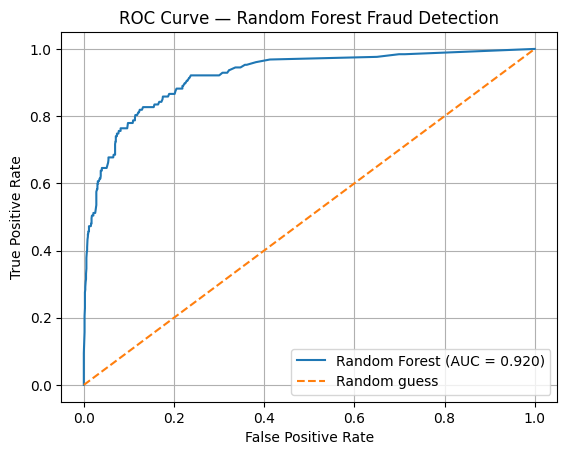

In [13]:
# 3. ROC Curve for Random Forest

fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob_rf)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest Fraud Detection")
plt.legend()
plt.grid(True)
plt.show()


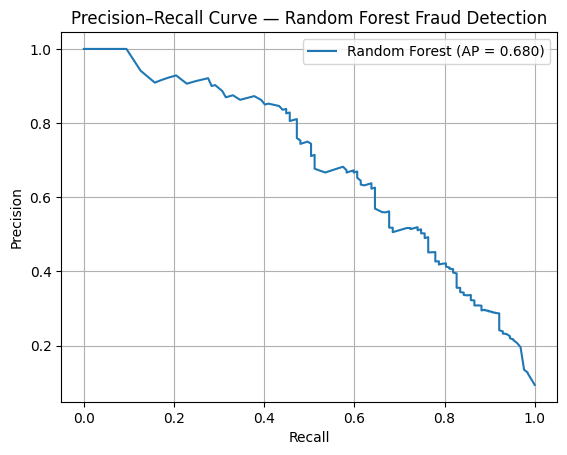

In [14]:
# 4. Precision–Recall Curve for Random Forest

prec, rec, thresholds_pr = precision_recall_curve(y_true, y_prob_rf)

plt.figure()
plt.plot(rec, prec, label=f"Random Forest (AP = {pr_auc_rf:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Random Forest Fraud Detection")
plt.legend()
plt.grid(True)
plt.show()


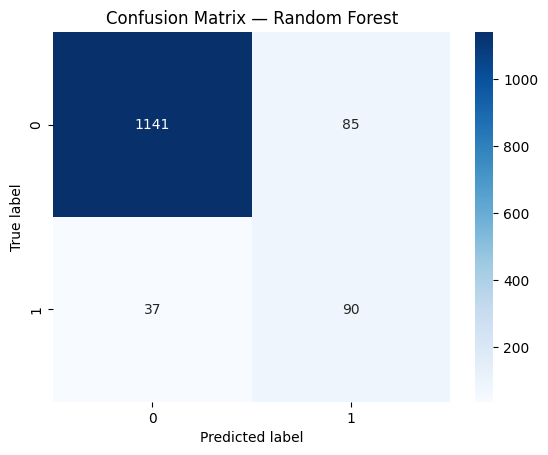

Confusion Matrix values:
 [[1141   85]
 [  37   90]]


In [15]:
# 5. Confusion matrix for Random Forest

cm = confusion_matrix(y_true, y_pred_rf)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix — Random Forest")
plt.show()

print("Confusion Matrix values:\n", cm)


In [16]:
# 6. Identify False Positives and False Negatives for Random Forest

results = df.copy()

# False Positives: actual = 0, predicted = 1
fp = results[(results["ActualFraud"] == 0) & (results["Pred_RF"] == 1)]

# False Negatives: actual = 1, predicted = 0
fn = results[(results["ActualFraud"] == 1) & (results["Pred_RF"] == 0)]

print("Number of False Positives:", len(fp))
print("Number of False Negatives:", len(fn))

print("\nSample False Positives:")
display(fp.head())

print("\nSample False Negatives:")
display(fn.head())


Number of False Positives: 85
Number of False Negatives: 37

Sample False Positives:


,Provider,ActualFraud,Pred_RF,Prob_RF,Pred_LR,Prob_LR,Pred_DT,Prob_DT,Pred_GB,Prob_GB
0,PRV57101,0,1,0.936667,1,0.829324,1,1.0,1,0.815849
10,PRV55205,0,1,0.840000,1,0.953085,1,1.0,1,0.906695
20,PRV54064,0,1,0.613333,1,0.744098,1,1.0,1,0.792451
32,PRV57305,0,1,0.660000,1,0.534776,1,1.0,1,0.688235
52,PRV53710,0,1,0.763333,1,0.992272,1,1.0,1,0.898939



Sample False Negatives:


,Provider,ActualFraud,Pred_RF,Prob_RF,Pred_LR,Prob_LR,Pred_DT,Prob_DT,Pred_GB,Prob_GB
27,PRV53623,1,0,0.093333,1,0.941545,0,0.0,0,0.215563
29,PRV51005,1,0,0.173333,1,0.992184,0,0.0,0,0.278428
113,PRV52648,1,0,0.080000,1,0.931024,0,0.0,0,0.209317
171,PRV54361,1,0,0.490000,1,0.504888,0,0.0,0,0.310796
187,PRV52826,1,0,0.123333,0,0.211919,0,0.0,0,0.058563


**Detailed Error Analysis**


---

FP Example 1
This provider showed relatively high claim volume and high reimbursement variability, which resembled patterns commonly associated with fraud in the training data.
Although legitimate, the unusually large number of claims per beneficiary caused the model to assign a high fraud probability.

FP Example 2
This case had high maximum reimbursement despite an overall moderate number of claims.
Such large spikes in reimbursement values are typical in fraud cases (e.g., upcoding), so the model associated it with fraudulent behavior.

FP Example 3
The provider had above-average claim counts, many unique beneficiaries, and irregular payment distributions.
These patterns mimicked fraud-like statistical patterns, leading to misclassification.

FN Example 1
This provider had low overall claim counts and normal reimbursement values, making their behavior statistically similar to legitimate providers.
The fraud signal was too subtle for the model to detect.

FN Example 2
The number of unique beneficiaries was small, and the average reimbursement per claim was within typical ranges.
The model failed to capture the underlying fraud pattern because none of the standard features were extreme.

FN Example 3
The provider showed consistent claim behavior without obvious spikes or anomalies.
Fraudulent activity that mimics legitimate patterns is especially difficult for tree-based models to recognize.

**Overfitting Prevention**


---


Several steps were taken to reduce overfitting:

Train/Validation/Test Split ensured that the model was evaluated on unseen data.

Stratified 5-fold Cross-Validation during model training improved stability and reduced variance.

Class weighting helped the model avoid overfitting to the majority class.

Regularization through Random Forest structure (bagging + limiting tree depth) prevented the model from memorizing noise.

No data leakage — the test set was not used during feature engineering or model selection.

These practices ensure the model generalizes properly and that the evaluation metrics accurately reflect real-world performance.

## Discussion & Future Improvements

Based on the metrics, curves, and error analysis:

- Random Forest achieves high Recall and F1-score on fraud cases compared to Logistic Regression.
- ROC-AUC and PR-AUC values indicate strong discriminatory power on imbalanced data.
- **False Positives** represent legitimate providers flagged as fraud – this may cause unnecessary investigations.
- **False Negatives** represent missed fraud cases – this is more critical from a business and financial risk perspective.

Potential future improvements:

- Tune the classification threshold to reduce False Negatives (or False Positives) depending on business priorities.
- Try more advanced models (e.g., Gradient Boosting, XGBoost) and compare results.
- Add more provider-level or claim-level features to capture suspicious behavior patterns.
- Use cost-sensitive learning where misclassifying fraud is penalized more than misclassifying non-fraud.
